# BANK MARKETING (With social and economic context)

## Summary

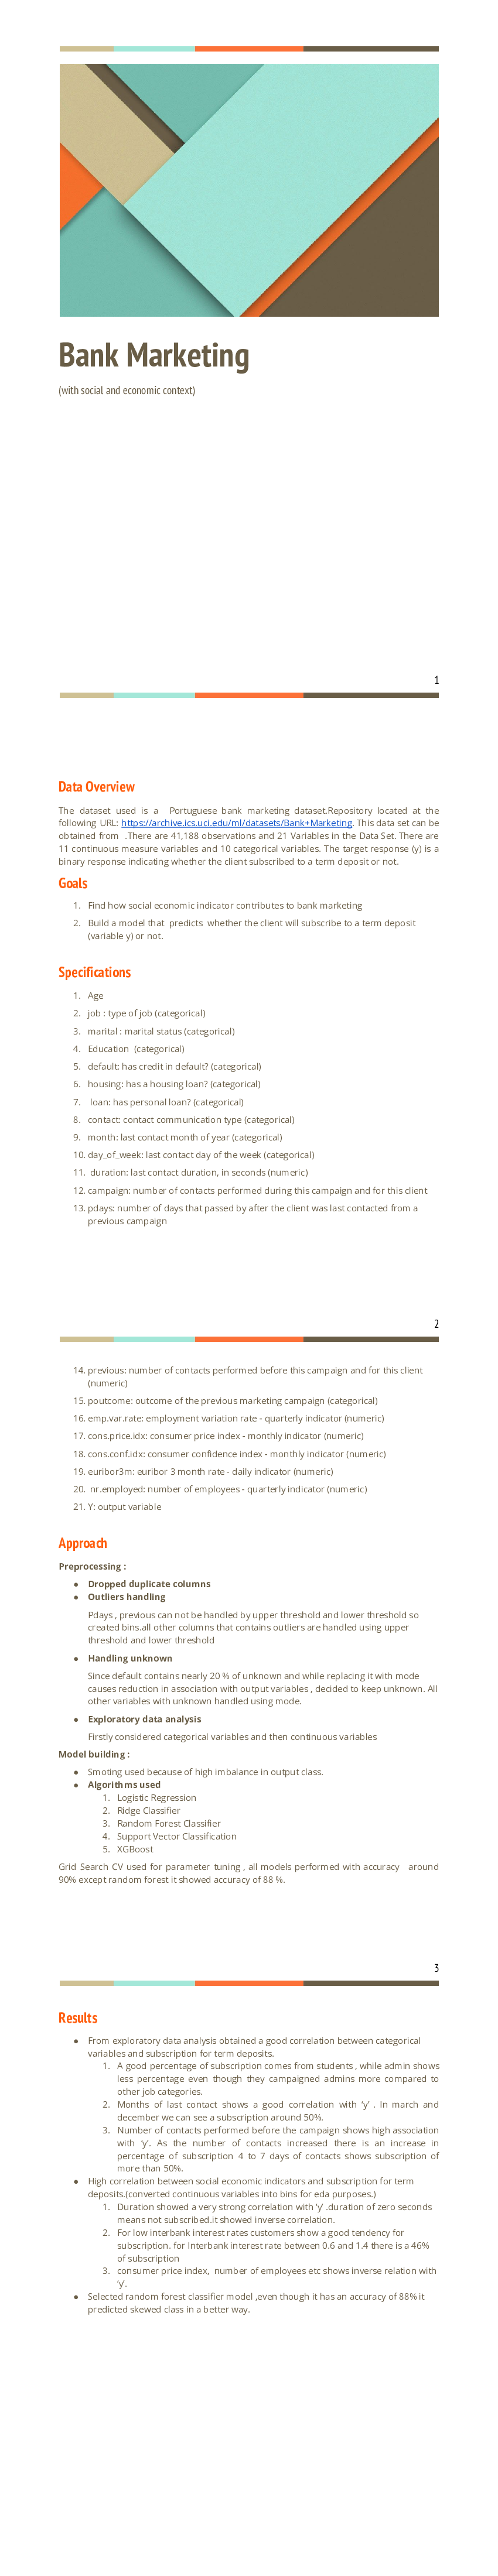

In [1]:
from wand.image import Image  
imageFromPdf = Image(filename='project21.pdf',resolution=100)  
pages = len(imageFromPdf.sequence)  

image = Image(width=imageFromPdf.width,height=imageFromPdf.height * pages)  
for i in range(pages):  
    image.composite(imageFromPdf.sequence[i],top=imageFromPdf.height * i,left=0)  
image.format="png"  
image

#### Importing necessary modules

In [2]:
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns
import pandas as pd
import researchpy
import matplotlib.pyplot as plt
import plotly.graph_objects as go 
from plotly.subplots import make_subplots

#### Data overview

In [3]:
data=pd.read_csv("/home/user/Downloads/bank-additional-full.csv",sep=';')
data.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

# 1 . Preprocessing

## 1.1 Data Cleaning

In [4]:
data.shape

(41188, 21)

In [5]:
data[data.duplicated(keep=False)]

age          job   marital            education  default housing loan  \
1265    39  blue-collar   married             basic.6y       no      no   no   
1266    39  blue-collar   married             basic.6y       no      no   no   
12260   36      retired   married              unknown       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14155   27   technician    single  professional.course       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16819   47   technician  divorced          high.school       no     yes   no   
16956   47   technician  divorced          high.school       no     yes   no   
18464   32   technician    single  professional.course       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20072   55     services   married          high.school  unknown      no   no   
20216   55     services   married          high.school  unknown      no   no   
20531   41   technician   married  professional.course       no     yes   no   
20534   41   technician   married  professional.course       no     yes   no   
25183   39       admin.   married    university.degree       no      no   no   
25217   39       admin.   married    university.degree       no      no   no   
28476   24     services    single          high.school       no     yes   no   
28477   24     services    single          high.school       no     yes   no   
32505   35       admin.   married    university.degree       no     yes   no   
32516   35       admin.   married    university.degree       no     yes   no   
36950   45       admin.   married    university.degree       no      no   no   
36951   45       admin.   married    university.degree       no      no   no   
38255   71      retired    single    university.degree       no      no   no   
38281   71      retired    single    university.degree       no      no   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
1265   telephone   may         thu  ...         1    999         0   
1266   telephone   may         thu  ...         1    999         0   
12260  telephone   jul         thu  ...         1    999         0   
12261  telephone   jul         thu  ...         1    999         0   
14155   cellular   jul         mon  ...         2    999         0   
14234   cellular   jul         mon  ...         2    999         0   
16819   cellular   jul         thu  ...         3    999         0   
16956   cellular   jul         thu  ...         3    999         0   
18464   cellular   jul         thu  ...         1    999         0   
18465   cellular   jul         thu  ...         1    999         0   
20072   cellular   aug         mon  ...         1    999         0   
20216   cellular   aug         mon  ...         1    999         0   
20531   cellular   aug         tue  ...         1    999         0   
20534   cellular   aug         tue  ...         1    999         0   
25183   cellular   nov         tue  ...         2    999         0   
25217   cellular   nov         tue  ...         2    999         0   
28476   cellular   apr         tue  ...         1    999         0   
28477   cellular   apr         tue  ...         1    999         0   
32505   cellular   may         fri  ...         4    999         0   
32516   cellular   may         fri  ...         4    999         0   
36950   cellular   jul         thu  ...         1    999         0   
36951   cellular   jul         thu  ...         1    999         0   
38255  telephone   oct         tue  ...         1    999         0   
38281  telephone   oct         tue  ...         1    999         0   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
1265   nonexistent          1.1          93.994          -36.4      4.855   
1266   nonexistent          1.1          93.994          -36.4      4.855   
12260  nonexistent      

In [6]:
data=data.drop_duplicates()

In [7]:
data.shape

(41176, 21)

In [8]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [9]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

### 1.12 Handling Outliers

- checking for outliers

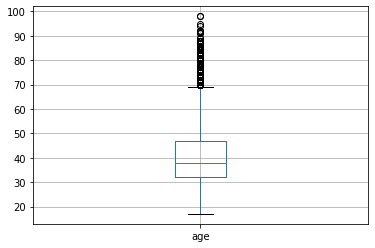

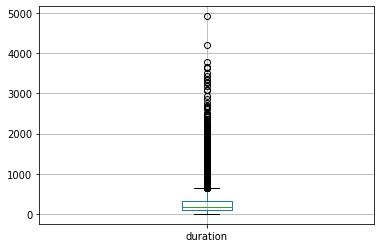

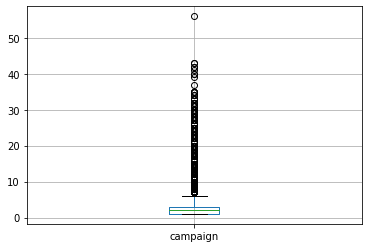

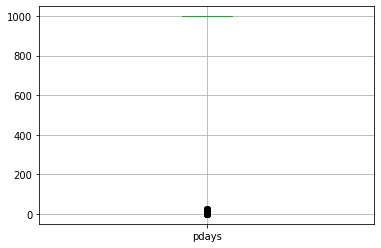

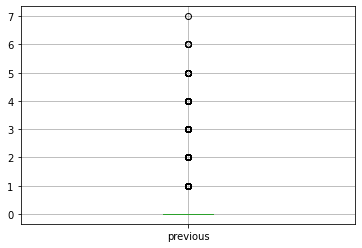

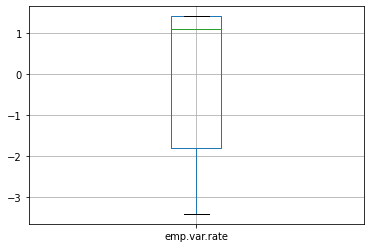

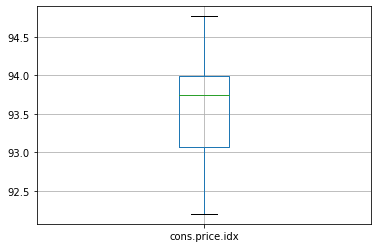

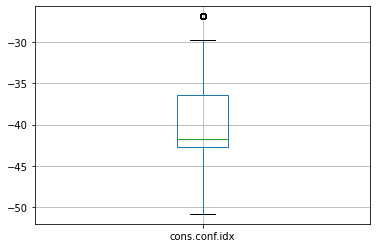

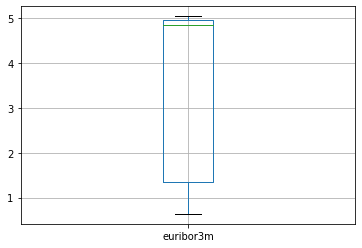

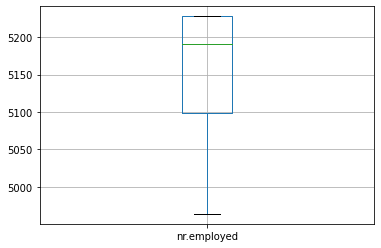

In [10]:

for columns in (data.dtypes[data.dtypes!='object'].index):
    plt.figure()
    data.boxplot([columns])


- pdays,previous have outliers, but both can't be changed using iqr,considering seperatly

#### 1. Column:- pdays

- pdays values can't be handled by iqr => all values will be changed to 999 
- created new column by binning old pdays

In [11]:
data['y']=data['y'].map({'yes':1,'no':0})

In [12]:
data.corr()['pdays']['y']


-0.324947586385566

In [13]:
data['pdays']=pd.cut(data['pdays'],bins=[-0.9,5,31,999],labels=['0 to 5 days','6 to 31 days','no previous cnt'])

In [14]:
crosstab,res=researchpy.crosstab(data['y'],data['pdays'],test='chi-square')
res.iloc[[2]]

Chi-square test  results
2   Cramer's V =    0.3249

#### 2. Column:- previous

In [15]:
data.corr()['previous']['y']

0.2302015702154456

In [16]:
data['previous'].value_counts()

0    35551
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [17]:
data['previous']=pd.cut(data['previous'],bins=[-0.9,0,1,3,7],labels=['not contacted','1day','2 or 3 days','4 to 7 days'])

In [18]:
data['previous'].value_counts()

not contacted    35551
1day              4561
2 or 3 days        970
4 to 7 days         94
Name: previous, dtype: int64

In [19]:
crosstab,res=researchpy.crosstab(data['y'],data['previous'],test='chi-square')
res.loc[[2]]

Chi-square test  results
2   Cramer's V =    0.2345

#### 3. Columns:- age,campaign,cons.conf.idx

In [20]:
from scipy.stats import iqr
list_box=['age','campaign','cons.conf.idx','duration']
for column in list_box:
    UT=data[column].quantile(.75)+iqr(data[column])*1.5
    LT=data[column].quantile(.25)-iqr(data[column])*1.5
    data[column]=data[column].clip(lower=LT,upper=UT)

### 1.13 Handling Unknown

- finding percentage of 'unknown' present

In [21]:
unknown_pcnt=data.isin(['unknown']).sum()*(100/len(data))
unknown_pcnt

age                0.000000
job                0.801438
marital            0.194288
education          4.201477
default           20.876239
housing            2.404313
loan               2.404313
contact            0.000000
month              0.000000
day_of_week        0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000
euribor3m          0.000000
nr.employed        0.000000
y                  0.000000
dtype: float64

#### 1. Column:-default

In [22]:
data['default'].value_counts()

no         32577
unknown     8596
yes            3
Name: default, dtype: int64

- default has >20% unknown

In [23]:
cross,res=researchpy.crosstab(data['y'],data['default'],test='chi-square')
res

Chi-square test   results
0  Pearson Chi-square ( 2.0) =   406.5561
1                    p-value =     0.0000
2                 Cramer's V =     0.0994

- unknown changing using mode

In [24]:
data_cp=data.copy()
data_cp['default'][data_cp['default']=='unknown']=data_cp['default'].mode()[0]


In [25]:
cross,res=researchpy.crosstab(data_cp['y'],data_cp['default'],test='chi-square')
res.iloc[[2]]

Chi-square test  results
2  Cramer's phi =     0.003

- 0.09---->0.003
- for default column decided to consider unknown 

#### 2. Other columns with unknown

- filled all other variables with mode except default

In [26]:
list_n=unknown_pcnt[unknown_pcnt>0][unknown_pcnt<20].index
for column in list_n:
    data[column][data[column]=='unknown']=data[column].mode()[0]

## 1.2 EDA

### 1.21 Object&category variables

#### 1.  Column:- job, y

##### Jobs are grouped according to yes, no

In [27]:
cross_tab=(pd.crosstab(index=data['y'],columns=data['job'],margins=True))
cross_tab

job  admin.  blue-collar  entrepreneur  housemaid  management  retired  \
y                                                                        
0      9361         8615          1332        954        2596     1284   
1      1388          638           124        106         328      434   
All   10749         9253          1456       1060        2924     1718   

job  self-employed  services  student  technician  unemployed    All  
y                                                                     
0             1272      3644      600        6009         870  36537  
1              149       323      275         730         144   4639  
All           1421      3967      875        6739        1014  41176

##### percentage wise distribution of each jobs among total persons campaigned

In [28]:
cross_tab=pd.crosstab(index=data['y'],columns=data['job'],margins=True,normalize='index')*100
cross_tab

job     admin.  blue-collar  entrepreneur  housemaid  management   retired  \
y                                                                            
0    25.620604    23.578838       3.64562   2.611052    7.105126  3.514246   
1    29.920241    13.752964       2.67299   2.284975    7.070489  9.355465   
All  26.105013    22.471828       3.53604   2.574315    7.101224  4.172333   

job  self-employed  services   student  technician  unemployed  
y                                                               
0         3.481402  9.973452  1.642171   16.446342    2.381148  
1         3.211899  6.962707  5.928002   15.736150    3.104117  
All       3.451039  9.634253  2.125024   16.366330    2.462600

- ##### Job has a strong association with subscription

In [29]:
cross_tab1=pd.crosstab(index=data['job'],columns=data['y'],normalize='index')*100
x=cross_tab1.index
fig = go.Figure(go.Bar(x=x, y=cross_tab1[0].values, name='no'))
fig.add_trace(go.Bar(x=x, y=cross_tab1[1].values, name='yes'))
fig.update_layout(barmode='stack')

fig.show()

In [30]:
## y
fig = go.Figure(data=[go.Pie(labels=['no','yes'], values=data['y'].value_counts().values, hole=.5,marker=dict(colors=['lightskyblue','limegreen']))])
fig.update_layout(annotations=[dict(text='y', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

- #### campaign covered mostly admin,among them only $12$% subscribed
- #### for student and retired persons percentage of subscription is more compared to other jobs
- #### student subscribed around $31$%
- #### retired subscribed around $ 25$% 
- #### there is imbalance in yes,no in y so need smoting

### 2. columns:-marital, poutcome, month, day of week

In [31]:
cs_marital=(pd.crosstab(data['y'],data['marital'],margins=True,normalize=True))*100
cs_marital

marital   divorced    married     single         All
y                                                   
0        10.042258  54.541480  24.149990   88.733728
1         1.156013   6.175928   3.934331   11.266272
All      11.198271  60.717408  28.084321  100.000000

In [32]:
from plotly.subplots import make_subplots
fig=make_subplots(rows=2, cols=2)
cs_marital=pd.crosstab(index=data['marital'],columns=data['y'],normalize='index')*100
fig.add_trace(go.Bar(x=cs_marital.index,y=cs_marital[1].values,name='yes',marker_color='gold'),row=1,col=1)
fig.add_trace(go.Bar(x=cs_marital.index,y=cs_marital[0].values,name='no',marker_color='coral'),row=1,col=1)
fig.update_xaxes(title_text="marital status", row=1, col=1)
#
cs_poutcome=pd.crosstab(index=data['poutcome'],columns=data['y'],normalize='index')*100
fig.add_trace(go.Bar(x=cs_poutcome.index,y=cs_poutcome[1].values,showlegend=False,marker_color='gold'),row=1,col=2)
fig.add_trace(go.Bar(x=cs_poutcome.index,y=cs_poutcome[0].values,showlegend=False,marker_color='coral'),row=1,col=2)
fig.update_xaxes(title_text="previous campaign outcome", row=1, col=2)
#
cs_month=pd.crosstab(index=data['month'],columns=data['y'],normalize='index')*100
fig.add_trace(go.Bar(x=cs_month.index,y=cs_month[1].values,name='yes',showlegend=False,marker_color='gold'),row=2,col=1)
fig.add_trace(go.Bar(x=cs_month.index,y=cs_month[0].values,name='no',showlegend=False,marker_color='coral'),row=2,col=1)
fig.update_xaxes(title_text="last contact month", row=2, col=1)
#
cs_week_day=pd.crosstab(index=data['day_of_week'],columns=data['y'],normalize='index')*100
fig.add_trace(go.Bar(x=cs_week_day.index,y=cs_week_day[1].values,showlegend=False,marker_color='gold'),row=2,col=2)
fig.add_trace(go.Bar(x=cs_week_day.index,y=cs_week_day[0].values,showlegend=False,marker_color='coral'),row=2,col=2)
fig.update_xaxes(title_text="last contact day", row=2, col=2)
fig.update_layout(barmode='stack',height=900, width=700)
fig.show()


- marital status shows weak association with subscription,there is no much difference in percetage
- among single catagory subscribed -->14%
- last contact month has a very strong association (march,dec,oct,sep shows higher subscription)
- day possess very weak association

### 3. columns:-housing ,education,Loan, contact

In [33]:
fig=make_subplots(rows=2, cols=2)
cs_housing=pd.crosstab(index=data['housing'],columns=data['y'],normalize='index')*100
fig.add_trace(go.Bar(x=cs_housing.index,y=cs_housing[1].values,name='yes',marker_color='midnightblue'),row=1,col=1)
fig.add_trace(go.Bar(x=cs_housing.index,y=cs_housing[0].values,name='no',marker_color='orchid'),row=1,col=1)
fig.update_xaxes(title_text="housing loan", row=1, col=1)
#
cs_education=pd.crosstab(index=data['education'],columns=data['y'],normalize='index')*100
fig.add_trace(go.Bar(x=cs_education.index,y=cs_education[1].values,showlegend=False,marker_color='midnightblue'),row=1,col=2)
fig.add_trace(go.Bar(x=cs_education.index,y=cs_education[0].values,showlegend=False,marker_color='orchid'),row=1,col=2)
fig.update_xaxes(title_text="education", row=1, col=2)
#
cs_loan=pd.crosstab(index=data['loan'],columns=data['y'],normalize='index')*100
fig.add_trace(go.Bar(x=cs_loan.index,y=cs_loan[1].values,name='yes',marker_color='midnightblue',showlegend=False),row=2,col=1)
fig.add_trace(go.Bar(x=cs_loan.index,y=cs_loan[0].values,name='no',marker_color='orchid',showlegend=False),row=2,col=1)
fig.update_xaxes(title_text="Personal Loan", row=2, col=1)
#
cs_contact=pd.crosstab(index=data['contact'],columns=data['y'],normalize='index')*100
fig.add_trace(go.Bar(x=cs_contact.index,y=cs_education[1].values,showlegend=False,marker_color='midnightblue'),row=2,col=2)
fig.add_trace(go.Bar(x=cs_contact.index,y=cs_education[0].values,showlegend=False,marker_color='orchid'),row=2,col=2)
fig.update_xaxes(title_text="Communication Type", row=2, col=2)
fig.update_layout(barmode='stack',height=900, width=700)
fig.show()

- housing loan has very weak association with subscription
- education has a weak association with subscription
- illiterate 22% subscribed
- Communication type has moderate assosciation(cellular 10%)
- Personal loan has very weak association

### 4. Columns:- pday, previous

In [34]:
fig=make_subplots(rows=1, cols=2)
cs_pdaynew=pd.crosstab(index=data['pdays'],columns=data['y'],normalize='index')*100
fig.add_trace(go.Bar(x=cs_pdaynew.index,y=cs_pdaynew[1].values,name='yes',marker_color='midnightblue'),row=1,col=1)
fig.add_trace(go.Bar(x=cs_pdaynew.index,y=cs_pdaynew[0].values,name='no',marker_color='orchid'),row=1,col=1)
fig.update_xaxes(title_text="no of days passed from previous campaign", row=1, col=1)
#
cs_previous=pd.crosstab(index=data['previous'],columns=data['y'],normalize='index')*100
fig.add_trace(go.Bar(x=cs_previous.index,y=cs_previous[1].values,showlegend=False,marker_color='midnightblue'),row=1,col=2)
fig.add_trace(go.Bar(x=cs_previous.index,y=cs_previous[0].values,showlegend=False,marker_color='orchid'),row=1,col=2)
fig.update_xaxes(title_text="no.of contacts before campaign", row=1, col=2)
#

- number of days that passed by after the client was last contacted from a previous campaign   has a very strong association
- number of contacts performed before this campaign and for this client has a strong   association        

### 1.22 continuous and discrete variables

### 1. Column:-cons.conf.idx

In [35]:
data_cp1=data.copy()

In [36]:
data_cp1['cons.conf.idx']=pd.cut(data_cp1['cons.conf.idx'],bins=7)

In [37]:
lis_con=data_cp1['cons.conf.idx'].value_counts().sort_index().index

In [38]:
lis_con1=[str(x) for x in lis_con]
cs_cons=pd.crosstab(index=data_cp1['cons.conf.idx'],columns=data_cp1['y'],normalize='index')*100
fig=go.Figure(go.Bar(x=lis_con1,y=cs_cons[1].values,name='yes',marker_color='palegreen'))
fig.add_trace(go.Bar(x=lis_con1,y=cs_cons[0].values,name='no',marker_color='violet'))
fig.update_xaxes(title_text="cons.conf.idx")


- it has a strong association with subscription
- as correlation indicate we can see an inverse relation

### 2. Column:-duration

In [39]:
data_cp1['duration']=data_cp1['duration']/60

In [40]:
data_cp1['duration']=pd.cut(data_cp1['duration'],bins=[-0.5,0,1,2,3,4,5,6,7,8,9,10,11])


In [41]:
lis_dur=data_cp1['duration'].value_counts().sort_index().index
lis_dur1=[str(x) for x in lis_dur]

In [42]:
lis_dur1=['0','(1.0, 2.0]','(2.0, 3.0]','(3.0, 4.0]','(4.0, 5.0]','(5.0, 6.0]','(6.0, 7.0]', '(7.0, 8.0]','(8.0, 9.0]','(9.0, 10.0]','(10.0, 11.0]']

In [43]:
cs_dur=pd.crosstab(index=data_cp1['duration'],columns=data_cp1['y'],normalize='index')*100
fig=go.Figure(go.Bar(x=lis_dur1,y=cs_dur[1].values,name='yes',marker_color='gray'))
fig.add_trace(go.Bar(x=lis_dur1,y=cs_dur[0].values,name='no',marker_color='limegreen'))
fig.update_xaxes(title_text="duration")

- duration shows high correlation
- 0  duration implies not subcribed


### 3. Column:-euribor3m

In [44]:
data_cp1['euribor3m']=pd.qcut(data_cp1['euribor3m'],q=10)

In [45]:
lis_eur=data_cp1['euribor3m'].value_counts().sort_index().index
lis_eur1=[str(x) for x in lis_eur]

In [46]:
cs_eur=pd.crosstab(index=data_cp1['euribor3m'],columns=data_cp1['y'],normalize='index')*100
fig=go.Figure(go.Bar(x=lis_eur1,y=cs_eur[1].values,name='yes',marker_color='black'))
fig.add_trace(go.Bar(x=lis_eur1,y=cs_eur[0].values,name='no',marker_color='tomato'))
fig.update_xaxes(title_text="euribor 3 month rate")

- shows strong correlation
- as interbank interest rate increase percentage of subscription decrease

### 4. Column:-age

In [47]:
data_cp1['age']=pd.qcut(data_cp1['age'],q=10)

In [48]:
lis_age=data_cp1['age'].value_counts().sort_index().index
lis_age1=[str(x) for x in lis_age]

In [49]:
cs_age=pd.crosstab(index=data_cp1['age'],columns=data_cp1['y'],normalize='index')*100
fig=go.Figure(go.Bar(x=lis_age1,y=cs_age[1].values,name='yes',marker_color='gold'))
fig.add_trace(go.Bar(x=lis_age1,y=cs_age[0].values,name='no',marker_color='coral'))
fig.update_xaxes(title_text="age")

- a good no.of subscription is comes from customers of age in the range of 17 to 31 and 55 to 70
- most no of subscription comes from student's and retired customers 

### 5. Column:-campaign

In [50]:
data.corr()['campaign']['y']

-0.06939731551002387

In [51]:
cs_camp=pd.crosstab(index=data['campaign'],columns=data['y'],normalize='index')*100
fig=go.Figure(go.Bar(x=cs_camp.index,y=cs_camp[1].values,name='yes',marker_color='midnightblue'))
fig.add_trace(go.Bar(x=cs_camp.index,y=cs_camp[0].values,name='no',marker_color='orchid'))
fig.update_xaxes(title_text="campaign")

- doesnt shows any good relation

### 6. Column:-emp.var.rate

In [52]:
data_cp1['emp.var.rate']=pd.cut(data_cp1['emp.var.rate'],bins=4)

In [53]:
lis_emp=data_cp1['emp.var.rate'].value_counts().sort_index().index
lis_emp1=[str(x) for x in lis_emp]

In [54]:
cs_emp=pd.crosstab(index=data_cp1['emp.var.rate'],columns=data_cp1['y'],normalize='index')*100
fig=go.Figure(go.Bar(x=lis_emp1,y=cs_emp[1].values,name='yes',marker_color='black'))
fig.add_trace(go.Bar(x=lis_emp1,y=cs_emp[0].values,name='no',marker_color='tomato'))
fig.update_xaxes(title_text="emp.var.rate")

### 7. Column:-nr.employed

In [55]:
data_cp1['nr.employed']=pd.cut(data_cp1['nr.employed'],bins=4)

In [56]:
lis_nr=data_cp1['nr.employed'].value_counts().sort_index().index
lis_nr1=[str(x) for x in lis_nr]

In [57]:
cs_nr=pd.crosstab(index=data_cp1['nr.employed'],columns=data_cp1['y'],normalize='index')*100
fig=go.Figure(go.Bar(x=lis_nr1,y=cs_emp[1].values,name='yes',marker_color='midnightblue'))
fig.add_trace(go.Bar(x=lis_nr1,y=cs_emp[0].values,name='no',marker_color='orchid'))
fig.update_xaxes(title_text="nr.employed")

- no of subscription more when number of employees less

### 6. Column:-cons.price.idx

In [58]:
data_cp1['cons.price.idx']=pd.qcut(data_cp1['cons.price.idx'],q=4)

In [59]:
lis_price=data_cp1['cons.price.idx'].value_counts().sort_index().index
lis_price1=[str(x) for x in lis_price]

In [60]:
cs_price=pd.crosstab(index=data_cp1['cons.price.idx'],columns=data_cp1['y'],normalize='index')*100
fig=go.Figure(go.Bar(x=lis_price1,y=cs_emp[1].values,name='yes',marker_color='black'))
fig.add_trace(go.Bar(x=lis_price1,y=cs_emp[0].values,name='no',marker_color='tomato'))
fig.update_xaxes(title_text="cons.price.idx")

- for low consumer price index showing more percentage of subscription

# 2. Model Building

## 2.1 Splitting, Smoting data 

- dropping y and day_of_week

In [61]:
X=data.drop(['y','day_of_week'],axis=1)

In [62]:
y=data['y']

In [63]:
X.shape

(41176, 19)

In [64]:
X=pd.get_dummies(X)

- splitting

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [66]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

## 2.2 Logistic regression

In [67]:
from sklearn.linear_model import LogisticRegression
l_reg=LogisticRegression()

In [33]:
from sklearn.model_selection import GridSearchCV
solver_values = ['newton-cg','sag','lbfgs']
penalty_values = ['l1', 'l2', 'elasticnet']
parameters = {'solver':solver_values , 'penalty': penalty_values }

In [42]:
logistic= GridSearchCV(l_reg, parameters)
logistic.fit(X_res, y_res)


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'sag', 'lbfgs']})

In [43]:
# obtaining best parameters
logistic.best_params_

{'penalty': 'l2', 'solver': 'newton-cg'}

In [66]:
logistic_reg = LogisticRegression(penalty = 'l2',solver='newton-cg')
logistic_reg.fit(X_res, y_res)

LogisticRegression(solver='newton-cg')

In [67]:
y_pred=logistic_reg.predict(X_test)

In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[10597,   332],
       [  825,   599]])

In [69]:
# accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9063385412450417

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10929
           1       0.64      0.42      0.51      1424

    accuracy                           0.91     12353
   macro avg       0.79      0.70      0.73     12353
weighted avg       0.89      0.91      0.90     12353



## 2.3 Ridge classifier

In [71]:
from sklearn.linear_model import RidgeClassifier
ridge = RidgeClassifier()
parameters = {'alpha': [ 1,4,4.9,4.8,4.7,4.75, 5, 5.5,10, 20]}
ridge_clr = GridSearchCV(ridge, parameters)
ridge_clr.fit(X_res, y_res)

GridSearchCV(estimator=RidgeClassifier(),
             param_grid={'alpha': [1, 4, 4.9, 4.8, 4.7, 4.75, 5, 5.5, 10, 20]})

In [51]:
ridge_clr.best_params_

{'alpha': 4.7}

In [72]:
ridge_classifier=RidgeClassifier(alpha=4.7)
ridge_classifier.fit(X_res, y_res)

RidgeClassifier(alpha=4.7)

In [73]:
y_pred=ridge_classifier.predict(X_test)

In [74]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[10634,   295],
       [  869,   555]])

In [75]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9057718772767749

In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     10929
           1       0.65      0.39      0.49      1424

    accuracy                           0.91     12353
   macro avg       0.79      0.68      0.72     12353
weighted avg       0.89      0.91      0.90     12353



## 2.4 RFC

In [78]:
from sklearn.ensemble import RandomForestClassifier
cls=RandomForestClassifier()

In [57]:
n_estimators=[98,100] 
criterion=['gini','entropy'] 
max_depth=[3,5,10] 
max_features =["log2","sqrt"]
parameters={'n_estimators': n_estimators,'criterion':criterion,'max_features':max_features,'max_depth':max_depth} #this will undergo 4*2*3 = 24 iterations
RFC_cls = GridSearchCV(cls, parameters)
RFC_cls.fit(X_res,y_res)

GridSearchCV(estimator=RandomForestClassifier(max_depth=10,
                                              max_features='sqrt'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10],
                         'max_features': ['log2', 'sqrt'],
                         'n_estimators': [98, 100]})

In [58]:
RFC_cls.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'log2',
 'n_estimators': 100}

In [84]:
rfc=RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=10,max_features='log2')

In [85]:
rfc.fit(X_res,y_res)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='log2')

In [86]:
y_pred=rfc.predict(X_test)

In [87]:
#accuracy score
accuracy_score(y_test,y_pred)

0.8877195822877034

In [88]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93     10929
           1       0.51      0.70      0.59      1424

    accuracy                           0.89     12353
   macro avg       0.73      0.81      0.76     12353
weighted avg       0.91      0.89      0.90     12353



## 2.5 SVC

In [55]:
from sklearn.svm import SVC  
sv=SVC()

In [92]:
parameters = {'kernel':['linear','poly']}

In [94]:
sv_c=GridSearchCV(sv, parameters)
sv_c.fit(X_res, y_res)

GridSearchCV(estimator=SVC(), param_grid={'kernel': ['linear', 'poly']})

In [56]:
sv_c.best_params_

{'kernel': 'linear'}

In [56]:
svclassifier=SVC(kernel='linear')
svclassifier.fit(X_res,y_res)

SVC(kernel='linear')

In [57]:
ypred=svclassifier.predict(X_test)

In [58]:
accuracy_score(y_test,ypred)

0.9013195175261071

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     10929
           1       0.61      0.39      0.48      1424

    accuracy                           0.90     12353
   macro avg       0.77      0.68      0.71     12353
weighted avg       0.89      0.90      0.89     12353



## 2.6 XGBoost

In [40]:
import xgboost as xgb
xg_cl = xgb.XGBClassifier()


In [46]:
max_depth=[3,5,10]
gamma=[0,1e-3,1e-2,1e-3,1e-2,0.1]
parameters={'gamma':gamma,'max_depth':max_depth}
xg=GridSearchCV(xg_cl, parameters)
xg.fit(X_res, y_res)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameter

In [47]:
xg.best_params_

{'gamma': 0, 'max_depth': 10}

In [49]:
xgboost=xgb.XGBClassifier(gamma=0,max_depth=10)
xgboost.fit(X_res,y_res)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:
ypred=xgboost.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,ypred)

0.9027766534445074

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     10929
           1       0.59      0.54      0.56      1424

    accuracy                           0.90     12353
   macro avg       0.76      0.74      0.75     12353
weighted avg       0.90      0.90      0.90     12353

